In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"E:\Datasets\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace=True)

In [9]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [10]:
df.shape

(10000, 11)

In [11]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Data Cleaning + EDA (Graphs & Visualizations)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

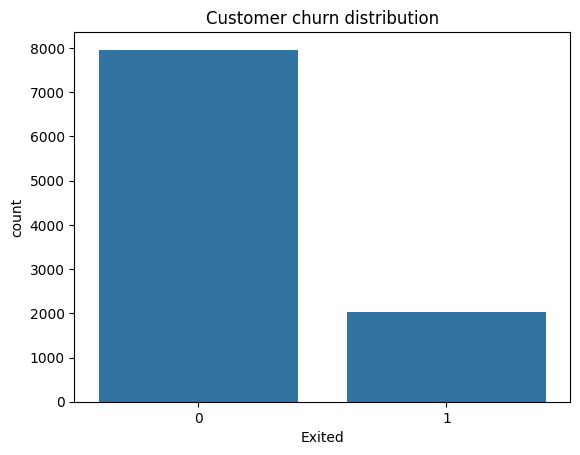

In [14]:
sns.countplot(x='Exited', data=df)
plt.title('Customer churn distribution')
plt.show()

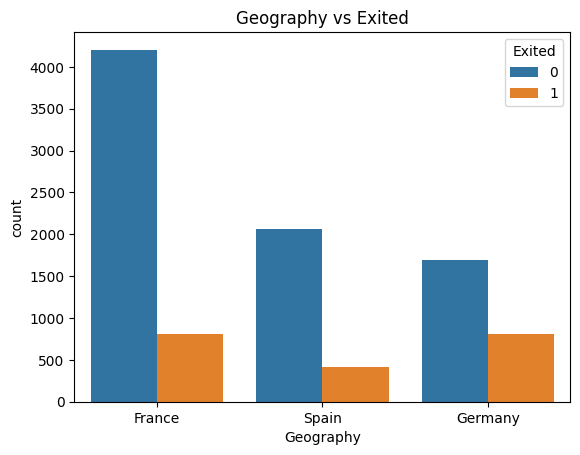

In [15]:
sns.countplot(x='Geography', hue= 'Exited', data=df)
plt.title('Geography vs Exited')
plt.show()

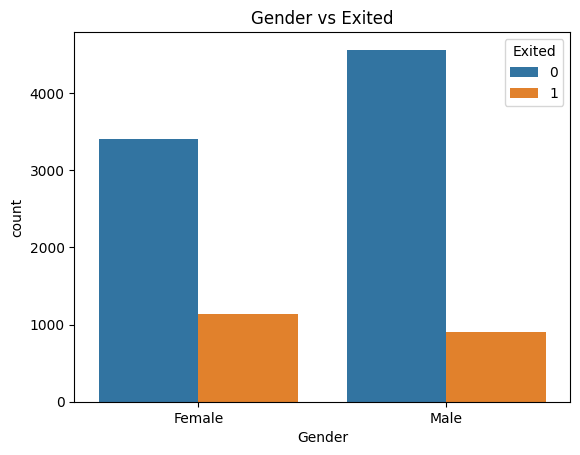

In [16]:
sns.countplot(x='Gender', hue = 'Exited', data = df)
plt.title('Gender vs Exited')
plt.show()

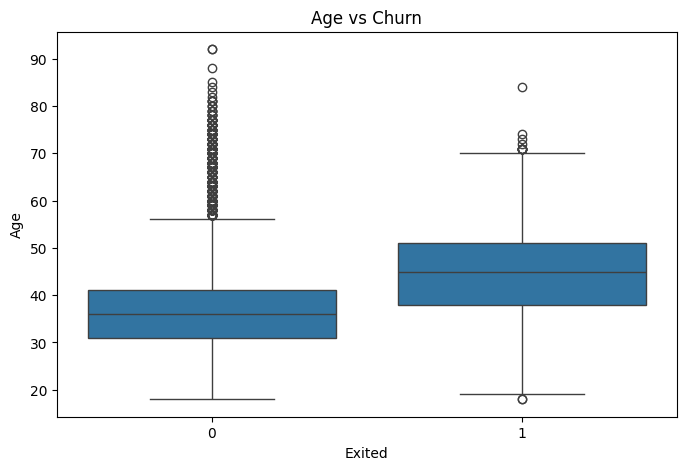

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Exited', y = 'Age', data = df)
plt.title('Age vs Churn')
plt.show()

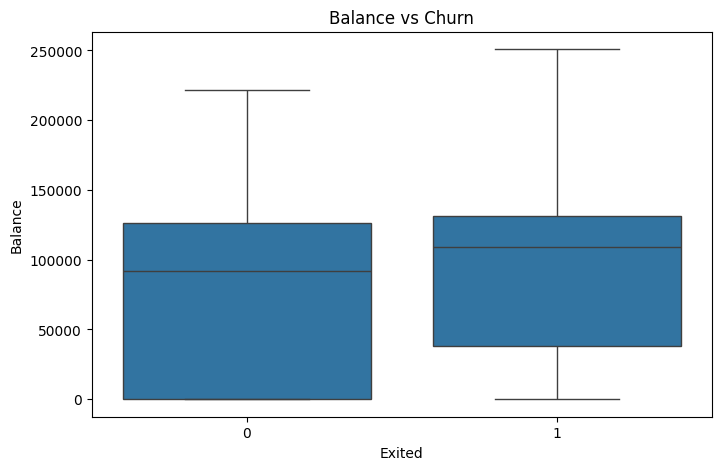

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Exited', y='Balance',data=df)
plt.title('Balance vs Churn')
plt.show()

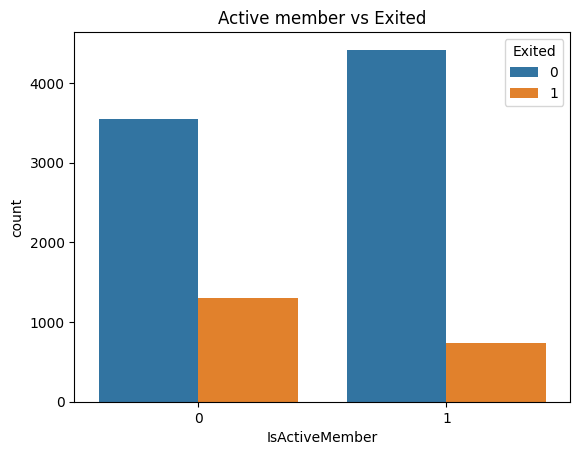

In [19]:
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df)
plt.title('Active member vs Exited')
plt.show()

## PHASE 3: Data Encoding + Model Building

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Encoding Categorical Data

In [21]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [22]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [23]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [24]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.811

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1543,   64],
       [ 314,   79]])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



#### 3.1: Logistic Regression with class_weight='balanced'

In [33]:
from sklearn.linear_model import LogisticRegression
balanced_model = LogisticRegression(class_weight= 'balanced', random_state = 42)
balanced_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
y_pred_bal = balanced_model.predict(X_test)

In [35]:
y_pred_bal[:10]

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_bal = accuracy_score(y_test, y_pred_bal)
accuracy_bal

0.7195

In [37]:
from sklearn.metrics import confusion_matrix
cm_bal = confusion_matrix(y_test, y_pred_bal)
cm_bal

array([[1159,  448],
       [ 113,  280]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



#### 3.2: Random Forest Classifier (Churn Power Model)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_model =  RandomForestClassifier(
    n_estimators = 80,
    max_depth = 10,
    random_state = 42, 
    class_weight = 'balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

,n_estimators,80
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred_rf = rf_model.predict(X_test)

In [41]:
y_pred_rf[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8465

In [43]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[1428,  179],
       [ 128,  265]])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.60      0.67      0.63       393

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000



## PHASE 4: Final Prediction Pipeline + Model Saving

In [45]:
import pickle
import joblib

In [46]:
joblib.dump(
    rf_model,
    "churn_random_forest_model.pkl",
    compress=3
)


['churn_random_forest_model.pkl']

In [47]:
joblib.dump(
    scaler,
    "scaler.pkl",
    compress=3
)

['scaler.pkl']

In [49]:
loaded_model = joblib.load("churn_random_forest_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")


In [50]:
def predict_churn(input_data):
    """
    input_data: list or array of customer features
    returns: churn prediction (0 or 1)
    """
    input_data = np.array(input_data).reshape(1, -1)
    input_data = loaded_scaler.transform(input_data)
    prediction = loaded_model.predict(input_data)
    return prediction[0]

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
sample_customer = [
    600, 1, 45, 3, 120000, 1, 1, 0, 50000, 1, 0
]
predict_churn(sample_customer)

np.int64(1)

In [53]:

result = predict_churn(sample_customer)
if result == 1: 
    print("The customer is likely to churn.")
    
else:
    print("The customer is likely to stay.")

The customer is likely to churn.
